In [35]:
import full_nuclide_ap21
import full_nuclide_ap21_r
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [36]:
def plot(tmin, tmax, sol, network, outfile='test'):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for i in range(network.nnuc):
        ax.loglog(sol.t, sol.y[i,:] * network.A[i], label=f"X({network.names[i].capitalize()})")

    ax.set_xlim(tmin, tmax)
    ax.set_ylim(1.e-10, 1.0)
    ax.legend(fontsize="small")

    fig.set_size_inches((10, 8))
    fig.savefig(outfile)

def composition(network):

    # X0 = np.zeros(network.nnuc)
    # X0[network.jco55] = 1.0
    # X0[network.jn] = 1.0
    # X0[network.jcr48] = 1.0
    # X0[network.jfe52] = 1.0
    # X0[network.jhe4] = 1.0
    # X0[network.jmn51] = 1.0
    # X0[network.jni56] = 1.0
    # X0[network.jcr56] = 1.0
    # X0[network.jfe54] = 1.0
    # X0[network.jfe55] = 1.0
    # X0[network.jfe56] = 1.0
    # X0[network.jmn56] = 1.0
    # X0[network.jp] = 1.0

    X0 = np.zeros(network.nnuc)
    X0[network.jco55] = 0.0
    X0[network.jn] = 1.0
    X0[network.jcr48] = 1.0
    X0[network.jfe52] = 0.0
    X0[network.jhe4] = 1.0
    X0[network.jmn51] = 0.0
    X0[network.jni56] = 0.0
    X0[network.jcr56] = 0.0
    X0[network.jfe54] = 0.0
    X0[network.jfe55] = 0.0
    X0[network.jfe56] = 0.0
    X0[network.jmn56] = 0.0
    X0[network.jp] = 1.0

    X0 /= network.nnuc
    Y0 = X0/network.A

    return Y0

    

In [37]:
rho = 1.0e4
T = 7.0e9

Y0 = composition(full_nuclide_ap21)
Y0_r = composition(full_nuclide_ap21_r)

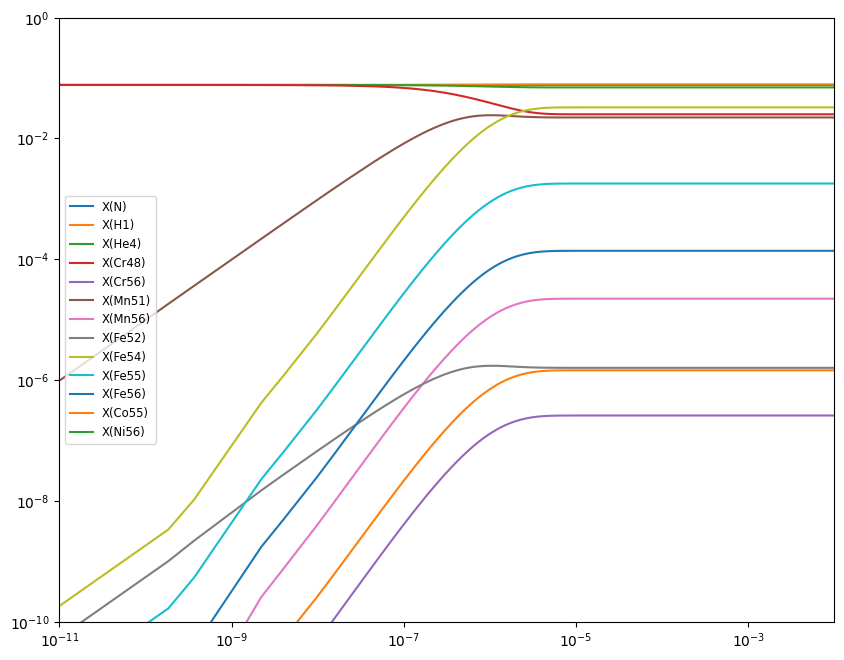

In [38]:
tmax = 1.0e-2
tmin = 1.0e-11

# tmax = 1.0e-2
# tmin = 1.0e-11

sol =  solve_ivp(full_nuclide_ap21.rhs, [0, tmax], Y0, method="BDF",
                dense_output=True, args=(rho, T), rtol=1.e-8, atol=1.e-8, jac=full_nuclide_ap21.jacobian)

# sol =  solve_ivp(full_nuclide_ap21.rhs, [0, tmax], Y0, method="BDF",
#                 dense_output=True, args=(rho, T), rtol=1.e-6, atol=1.e-6)
                
plot(tmin=tmin, tmax=tmax, sol=sol, network=full_nuclide_ap21, outfile='rho_{:.2e}_T_{:.2e}.png'.format(rho,T))

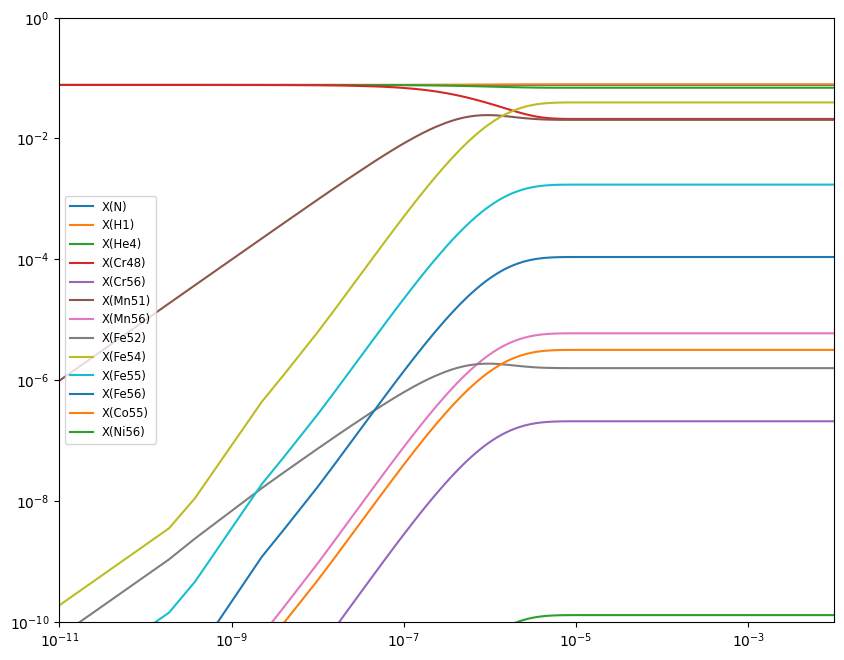

In [39]:
tmax = 1.0e-2
tmin = 1.0e-11

sol_r = solve_ivp(full_nuclide_ap21_r.rhs, [0, tmax], Y0_r, method="BDF",
                dense_output=True, args=(rho, T), rtol=1.e-8, atol=1.e-8, jac=full_nuclide_ap21_r.jacobian)

# sol_r = solve_ivp(full_nuclide_ap21_r.rhs, [0, tmax], Y0_r, method="BDF",
#                 dense_output=True, args=(rho, T), rtol=1.e-6, atol=1.e-6)

plot(tmin=tmin, tmax=tmax, sol=sol_r, network=full_nuclide_ap21_r, outfile='rho_{:.2e}_T_{:.2e}_r.png'.format(rho,T))